In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [32]:
import pandas as pd
train_data = pd.read_csv("C:/Users/jerme/Downloads/Problem Statement (6) (1)/train.csv")
test_data = pd.read_csv("C:/Users/jerme/Downloads/Problem Statement (6) (1)/test.csv")

In [3]:
print("Train Dataset:")
print("Shape:", train_data.shape)
print(train_data.head())
print(train_data.info())
print(train_data.describe())

print("\nTest Dataset:")
print("Shape:", test_data.shape)
print(test_data.head())
print(test_data.info())
print(test_data.describe())

Train Dataset:
Shape: (31647, 18)
      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2

In [4]:
print("Missing values in train dataset:")
print(train_data.isnull().sum())

print("\nMissing values in test dataset:")
print(test_data.isnull().sum())

# Handle missing values (e.g., dropping rows)
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

Missing values in train dataset:
ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Missing values in test dataset:
ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


Missing values in train dataset:
ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Missing values in test dataset:
ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


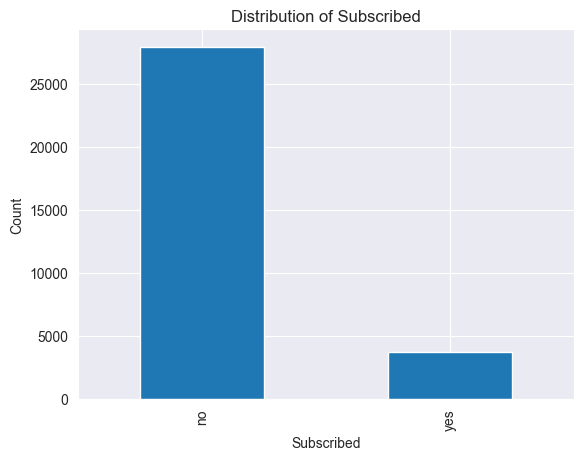

ValueError: could not convert string to float: 'no'

In [11]:
from sklearn.preprocessing import LabelEncoder

# Step 4: Data preprocessing

# Check for missing values in train dataset
print("Missing values in train dataset:")
print(train_data.isnull().sum())

# Check for missing values in test dataset
print("\nMissing values in test dataset:")
print(test_data.isnull().sum())

# Handle missing values (e.g., dropping rows)
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Identify categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Combine train and test data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Encode categorical columns in combined data
label_encoder = LabelEncoder()
for column in categorical_columns:
    combined_data[column] = label_encoder.fit_transform(combined_data[column])

# Split the data back into train and test
train_data = combined_data.iloc[:len(train_data), :]
test_data = combined_data.iloc[len(train_data):, :]

# Step 5: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of the target variable
train_data['subscribed'].value_counts().plot(kind='bar')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.title('Distribution of Subscribed')
plt.show()

# Correlation matrix
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(train_data, hue='subscribed')
plt.show()

In [18]:
print("Columns in train data:", train_data.columns)
print("Columns in test data:", test_data.columns)

Columns in train data: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration_minutes', 'campaign', 'pdays', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')
Columns in test data: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration_minutes', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')


In [19]:
import pandas as pd
train_data = pd.read_csv("C:/Users/jerme/Downloads/Problem Statement (6) (1)/train.csv")
test_data = pd.read_csv("C:/Users/jerme/Downloads/Problem Statement (6) (1)/test.csv")

In [43]:
# Step 6: Feature Selection and Engineering

# Create a new feature 'duration_minutes' by converting 'duration' from seconds to minutes
train_data.loc['duration_minutes'] = train_data['duration'] / 60
test_data.loc['duration_minutes'] = test_data['duration'] / 60

# Select relevant features based on domain knowledge and EDA insights
selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']

# Update train and test data with selected features
train_data = train_data[selected_features]
test_data = test_data[selected_features[:-1]]  # Exclude the target variable 'subscribed' from test data

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming 'train.csv' and 'test.csv' are in the same directory as your notebook/script
train_data = pd.read_csv("C:/Users/jerme/Downloads/Problem Statement (6) (1)/train.csv")
test_data = pd.read_csv("C:/Users/jerme/Downloads/Problem Statement (6) (1)/test.csv")

# Encode categorical variables using LabelEncoder
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
label_encoder = LabelEncoder()

for column in categorical_columns:
    # Combine to fit and then transform to avoid unseen labels in test data
    combined = pd.concat([train_data[column], test_data[column]], axis=0)
    label_encoder.fit(combined)
    train_data[column] = label_encoder.transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Split the train data into features and target variable
X_train = train_data.drop(['subscribed'], axis=1)
y_train = train_data['subscribed'].map({'yes': 1, 'no': 0})  # Convert target variable to numeric

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(test_data)

# Save predictions to a CSV file
submission = pd.DataFrame({'ID': test_data['ID'], 'subscribed': y_pred})
submission['subscribed'] = submission['subscribed'].map({1: 'yes', 0: 'no'})  # Convert numeric predictions back to 'yes' and 'no'
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv


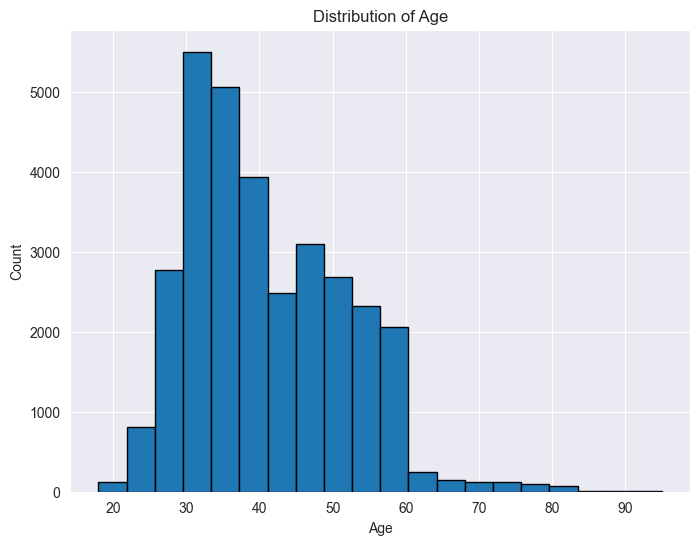

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(train_data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

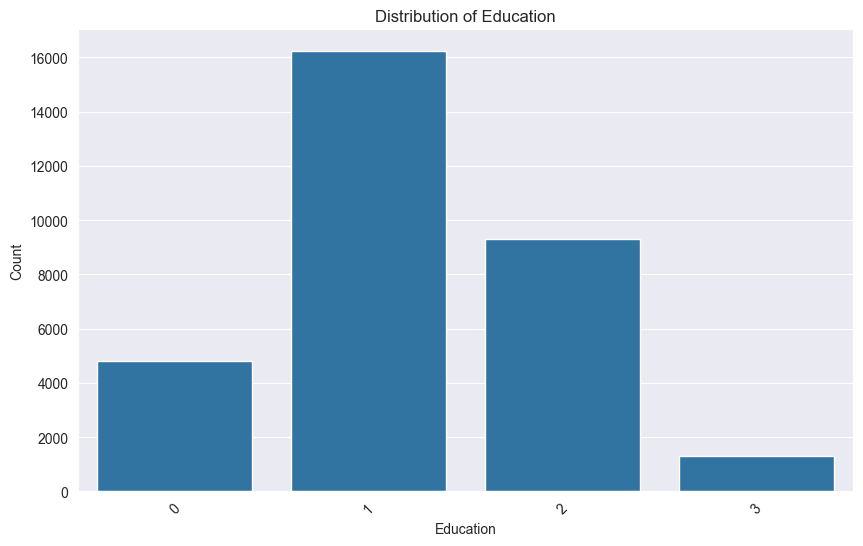

In [47]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=train_data)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.xticks(rotation=45)
plt.show()